In [1]:
%matplotlib inline
import logging
import Euclid
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np

from collections import namedtuple
from glob import glob
from matplotlib import colors
from astropy.table import Table, join
from astropy.io import fits
from tqdm.notebook import tqdm
from scipy.stats import gaussian_kde

%elogin
%erun Elements 5.10

sys.path.append('/home/aalvarez/Work/Projects/PHZ_NNPZ/PHZ_NNPZ/nnpz/python/')

%load_ext autoreload
%autoreload 2
from nnpz.reference_sample.ReferenceSample import ReferenceSample

plt.rcParams['figure.figsize'] = (20, 10)

In [2]:
target_z = Table.read('/home/aalvarez/Work/Data/SC8/PHZ_Prod/data/WithMcPDF.fits', hdu=1)
target_ib = Table.read('/home/aalvarez/Work/Data/SC8/PHZ_Prod/NnpzGalaxySed/output_file.fits', hdu=1)
bins = Table.read('/home/aalvarez/Work/Data/SC8/PHZ_Prod/data/WithMcPDF.fits', hdu='BINS_MC_PDF_1D_FLUX_IB624_EXT_SUBARU_APER')
zbins = Table.read('/home/aalvarez/Work/Data/SC8/PHZ_Prod/data/WithMcPDF.fits', hdu='BINS_PDF')
bins2d = Table.read('/home/aalvarez/Work/Data/SC8/PHZ_Prod/data/WithMcPDF.fits', hdu='BINS_MC_PDF_2D_FLUX_IB624_EXT_SUBARU_APER_FLUX_IB827_EXT_SUBARU_APER')

In [3]:
target = join(target_z, target_ib, 'OBJECT_ID')

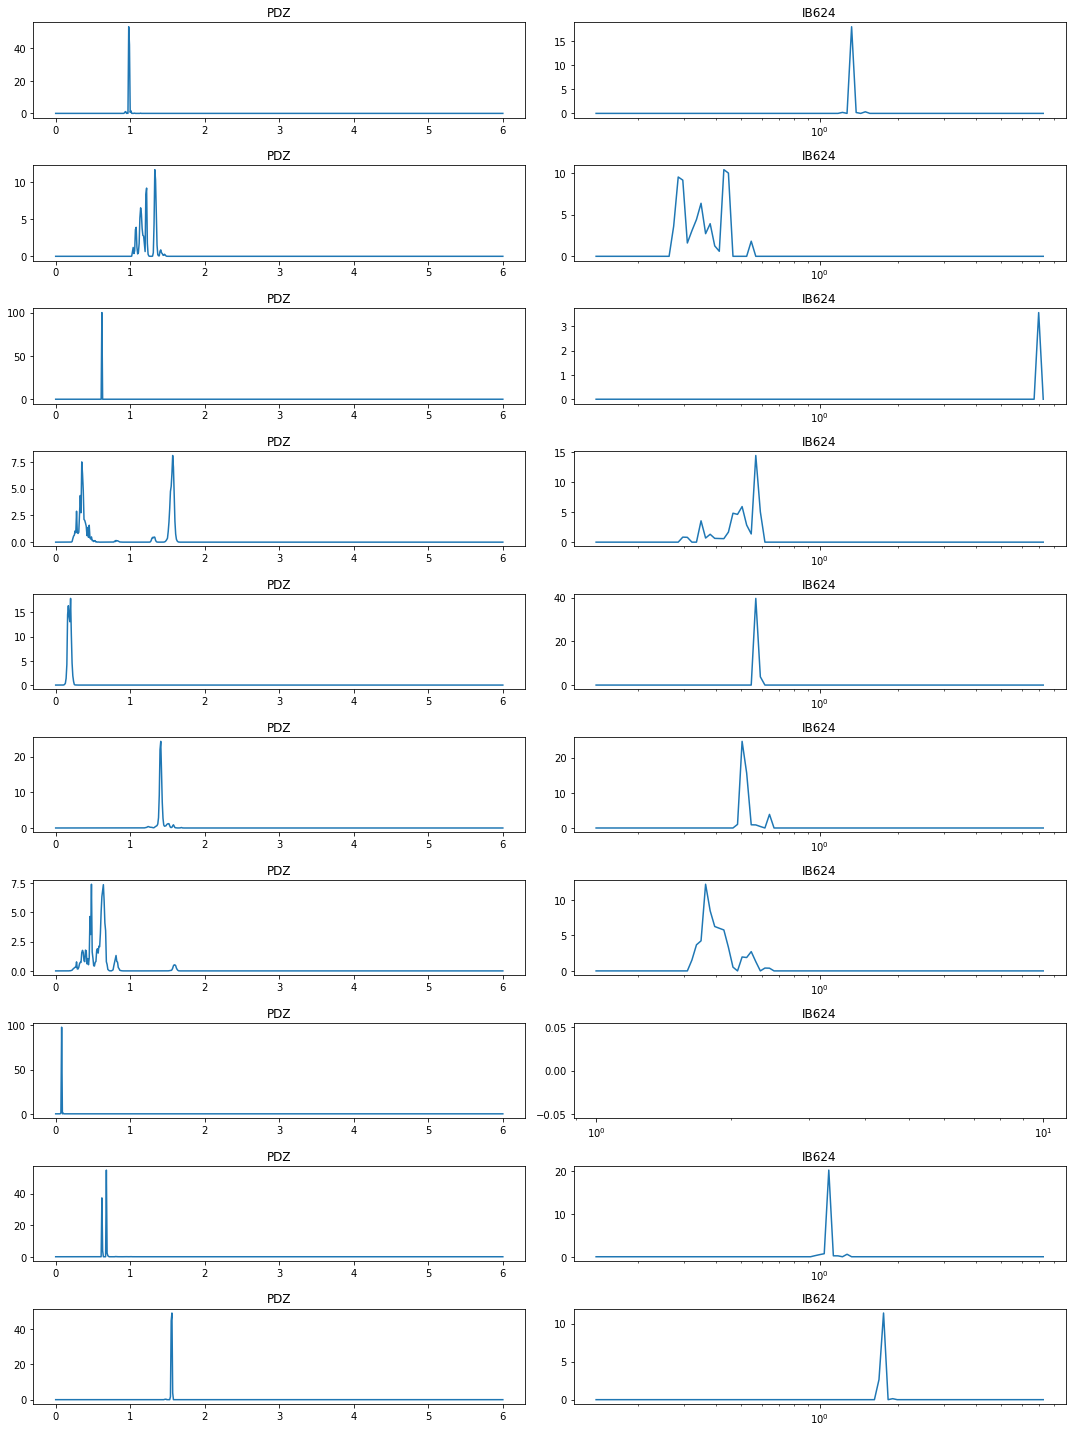

In [4]:
idx = np.random.choice(len(target), 10)

fig, axes = plt.subplots(ncols=2, nrows=len(idx), figsize=(15, 20))

for i, ax in zip(idx, axes):
    obj = target[i]
    ax[0].set_title('PDZ')
    ax[0].plot(zbins, obj['REDSHIFT_PDF'])
    ax[1].set_title('IB624')
    ax[1].plot(bins, obj['MC_PDF_1D_FLUX_IB624_EXT_SUBARU_APER'])
    ax[1].set_xscale('log')
    
plt.tight_layout()

# 2D

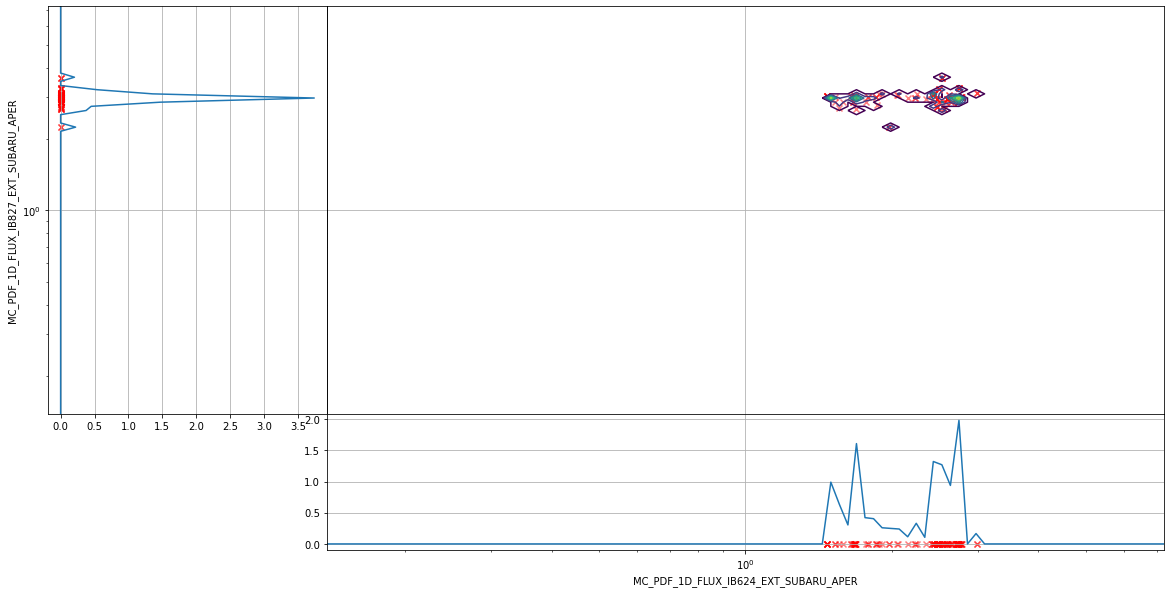

In [5]:
obj = target[9]

xx = bins2d['FLUX_IB624_EXT_SUBARU_APER'].reshape(99,99)
yy = bins2d['FLUX_IB827_EXT_SUBARU_APER'].reshape(99,99)
values = obj['MC_PDF_2D_FLUX_IB624_EXT_SUBARU_APER_FLUX_IB827_EXT_SUBARU_APER'].reshape(99,99)

plt.figure()
gs = gridspec.GridSpec(2, 2, width_ratios=[1,3], height_ratios=[3,1], hspace=0, wspace=0)
ax = plt.subplot(gs[0,1])
axl = plt.subplot(gs[0,0], sharey=ax)
axb = plt.subplot(gs[1,1], sharex=ax)

ax.contour(xx, yy, values)
ax.set_xscale('log')
ax.set_yscale('log')
ax.scatter(obj['MC_SAMPLES_FLUX_IB624_EXT_SUBARU_APER'], obj['MC_SAMPLES_FLUX_IB827_EXT_SUBARU_APER'], marker='x', color='red', alpha=0.5)
ax.grid(True)

axb.plot(bins, obj['MC_PDF_1D_FLUX_IB624_EXT_SUBARU_APER'])
axb.scatter(obj['MC_SAMPLES_FLUX_IB624_EXT_SUBARU_APER'], [0]*100, marker='x', color='red', alpha=0.5)
axb.set_xlabel('MC_PDF_1D_FLUX_IB624_EXT_SUBARU_APER')

axl.plot(obj['MC_PDF_1D_FLUX_IB827_EXT_SUBARU_APER'], bins)
axl.scatter([0]*100, obj['MC_SAMPLES_FLUX_IB827_EXT_SUBARU_APER'], marker='x', color='red', alpha=0.5)
axl.set_ylabel('MC_PDF_1D_FLUX_IB827_EXT_SUBARU_APER')

axb.grid(True)
axl.grid(True)